In [1]:
!pip install stylegan2_pytorch

In [2]:
import torch
from torchvision.utils import save_image
from stylegan2_pytorch import ModelLoader
import torchvision

In [7]:
!stylegan2_pytorch --data ./faces/faces --models_dir ./drive_new/models --results_dir ./drive_new/results --image-size 64 --num-train-steps 100000

default<./faces/faces>:   1%|            | 676/100000 [03:27<8:29:09,  3.25it/s]

continuing from previous epoch - 90
loading from version 1.8.9


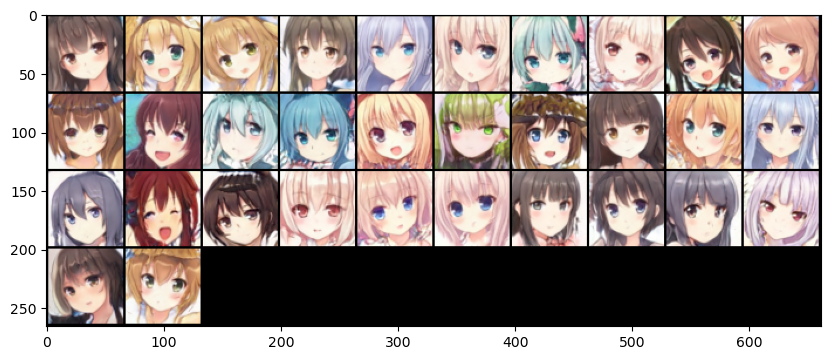

In [3]:
import matplotlib.pyplot as plt

loader = ModelLoader(
    base_dir= './drive_new/',
)

n_output = 1000
noise   = torch.randn(n_output, 512) # noise
styles  = loader.noise_to_styles(noise, trunc_psi = 0.75)  # pass through mapping network

# Show 32 of the images.
imgs_sample = loader.styles_to_images(styles[:32])
grid_img = torchvision.utils.make_grid(imgs_sample.cpu(), nrow=10)
plt.figure(figsize=(10,10))
plt.imshow(grid_img.permute(1, 2, 0))
plt.show()

In [4]:
import os

# Save the generated images.
os.makedirs('./drive_new/new_output', exist_ok=True)
eval_batch_size = 100

for i in range(10):
    images = loader.styles_to_images(styles[i*eval_batch_size:(i+1)*eval_batch_size])
    for j in range(eval_batch_size):
        save_image(images[j], f'./drive_new/new_output/{i*eval_batch_size+j+1}.jpg') # save your images, or do whatever you desire

In [5]:
# Compress the images.
%cd ./drive_new/new_output
!tar -zcf ./subimission.tgz *.jpg
%cd ..

/home/darkqq/LAB/robert/ML/HW6/drive_new/new_output
/home/darkqq/LAB/robert/ML/HW6/drive_new
